In [1]:
import numpy as np
import MyML.helper.partition as part
import numba as nb
import scipy.sparse as sp
import MyML.EAC.eac_new as eac

In [4]:
ensemble_file = '/home/chiroptera/QCThesis/datasets/ensemble_5000_sqrt.hdf'

In [5]:
ensemble = part.loadEnsembleFromFileHDF(ensemble_file)

In [6]:
n_samples = 5000

In [10]:
coo_mat = sp.coo_matrix((n_samples, n_samples), dtype=np.uint8)
lil_mat = sp.lil_matrix((n_samples, n_samples), dtype=np.uint8)
dok_mat = sp.dok_matrix((n_samples, n_samples), dtype=np.uint8)
csr_mat = sp.csr_matrix((n_samples, n_samples), dtype=np.uint8)
full_mat = np.zeros((n_samples, n_samples), dtype=np.uint8)

In [8]:
def build_coassoc_general(ensemble, matrix):
    for p in ensemble:
        for c in p:
            for i,n in enumerate(c):
                for j,n2 in enumerate(c[i+1:]):
                    matrix[n,n2] += 1

In [36]:
#%time build_coassoc_general(ensemble[0:1], coo_mat)
%time build_coassoc_general(ensemble[0:1], lil_mat)
%time build_coassoc_general(ensemble[0:1], dok_mat)
%time build_coassoc_general(ensemble[0:1], csr_mat)

CPU times: user 11.2 s, sys: 83.6 ms, total: 11.3 s
Wall time: 11.2 s
CPU times: user 27.8 s, sys: 260 ms, total: 28.1 s
Wall time: 28 s
CPU times: user 25min 14s, sys: 2.25 s, total: 25min 16s
Wall time: 25min 19s


LIL
CPU times: user 11.2 s, sys: 83.6 ms, total: 11.3 s
Wall time: 11.2 s
DOK
CPU times: user 27.8 s, sys: 260 ms, total: 28.1 s
Wall time: 28 s
CSR
CPU times: user 25min 14s, sys: 2.25 s, total: 25min 16s
Wall time: 25min 19s
FULL
CPU times: user 2.23 s, sys: 60 ms, total: 2.29 s
Wall time: 2.25 s

In [38]:
%time build_coassoc_general(ensemble[0:1], full_mat)

CPU times: user 2.23 s, sys: 60 ms, total: 2.29 s
Wall time: 2.25 s


In [11]:
%time build_coassoc_general(ensemble, lil_mat)
%time build_coassoc_general(ensemble, dok_mat)
%time build_coassoc_general(ensemble, full_mat)

CPU times: user 22min, sys: 8.36 s, total: 22min 9s
Wall time: 22min 2s


KeyboardInterrupt: 

In [ ]:
eacFull = eac.EAC(n_samples, sparse=False, condensed=True)
eacSp = eac.EAC(n_samples, sparse=True, condensed=True)

In [ ]:
%time eacFull.buildMatrix(ensemble)
%time eacSp.buildMatrix(ensemble)

# Visualize results

In [2]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from MyML.helper.plotting import save_fig

sns.set_style("whitegrid")
fig_width = 8
fig_height = 6

In [3]:
results_path = '/home/chiroptera/QCThesis/time_coassoc_sparse_types.csv'

In [4]:
print '--- resulss ---'
res_raw = pd.read_csv(results_path)
for col in res_raw.columns:
    print col 

--- resulss ---
Matrix type (condensed)
Time 1st partition [s]
Time ensemble [s]


In [5]:
print res_raw.to_latex(index=False)
res_raw

\begin{tabular}{lrr}
\toprule
  Matrix type (condensed) &  Time 1st partition [s] &  Time ensemble [s] \\
\midrule
 Optimzed Fully allocated &                 0.00170 &              0.139 \\
                  EAC\_CSR &                 0.00481 &              1.470 \\
          Fully allocated &                 0.85500 &             96.000 \\
                      LIL &                 5.39000 &            614.000 \\
                      DOK &                12.50000 &           1535.000 \\
                      CSR &               548.00000 &                NaN \\
\bottomrule
\end{tabular}



,Matrix type (condensed),Time 1st partition [s],Time ensemble [s]
0,Optimzed Fully allocated,0.00170,0.139
1,EAC_CSR,0.00481,1.470
2,Fully allocated,0.85500,96.000
3,LIL,5.39000,614.000
4,DOK,12.50000,1535.000
5,CSR,548.00000,NaN


In [6]:
res = res_raw.set_index('Matrix type (condensed)')
res

,Time 1st partition [s],Time ensemble [s]
Matrix type (condensed),,
Optimzed Fully allocated,0.00170,0.139
EAC_CSR,0.00481,1.470
Fully allocated,0.85500,96.000
LIL,5.39000,614.000
DOK,12.50000,1535.000
CSR,548.00000,NaN


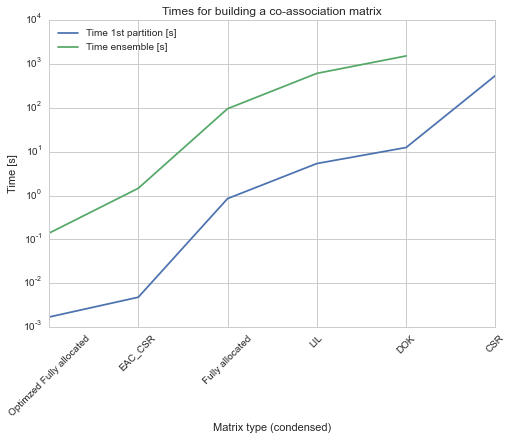

In [16]:
f1 = plt.figure(figsize=(fig_width,fig_height))
ax = f1.add_subplot(111)
res.plot(logy=True, title='Times for building a co-association matrix', ax=ax)
plt.xlabel('Matrix type (condensed)')
plt.ylabel('Time [s]')
plt.xticks(rotation=45)

In [44]:
save_fig(f1, '/home/chiroptera/workspace/thesis_writing/rsc/results/eac sparse build/coassoc_build', format='eps')